# <h1 style="text-align: center">An Analysis of Chess Openings</h1>
### <h3 style="text-align: center">Tutorial by Ben Moskowitz</h3>

## Introduction
Chess is an ancient game which up until recently was mostly a niche community and not part of mainstream culture. However, beginning with the pandemic, with people stuck at home and chess content growing rapidly, along with the release of the popular Netflix show <i> Queen's Gambit </i>, the chess community has seen an unprecented upsurge in interest and playerbase. While in person tournament are on a pause, we can see these incredible statistics through online chess services. Chess.com, one of the most popular chess platforms, saw a 160% increase in players over the past year, with the daily active users rising from 1.3M in March 2020 all the way up to over 3M by 2021. <br><br>
With the community of chess growing rapidly it is important to educate this new generation of players. Chess has been around for many years, with vast knowledge and analysis of the game done by champions of the game. An areas where this wealth of knowledge from these top players can be transferred to even the newest members of the game is opening analysis. <br><br>
The opening is a crucial part of the chess game, and one that can be greatly improved upon at any level through studying opening theory. The opening you play sets up the rest of your game, and without proper understanding of the opening it is very hard to progress in skill level. Additionally, studying openings can give one a better understanding of their style of play, which can help improve other aspects of their game. With all the new players beginning their chess journey, now is as good a time as any to do an analysis of chess openings! <br><br>
This tutorial will be studying many of what are commonly considered the top openings. We will look at statistics of these openings, see how they change at different skill levels and time formats, and help give a better understanding of what openings might work best for you.  

## Setup
These are the packages we will be using in this tutorial:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
%matplotlib inline

## Data Collection
Luckily for us, Kaggle has a dataset containing approximately 5 million games played on [lichess.org](https://lichess.org/), another popular online chess platform. These were games collected during the month of November in 2019. Since the data can be downloaded straight from Kaggle we can download it and begin by taking a look at the data it contains. As the dataframe is 3GB and that is too large for pandas to simply read in, I will be using [dask](https://docs.dask.org/en/latest/dataframe.html). Since some columns have mixed data types we will be setting low_memory to false and specifying the data types for the ones that it infers incorrectly.

In [2]:
df = dd.read_csv("lichess_data.csv", low_memory=False, 
                dtype={'BlackElo': 'float64',
                   'BlackRatingDifference': 'float64',
                    'TimeControl': 'float64',
                   'TimeIncrement': 'float64',
                   'WhiteElo': 'float64',
                   'WhiteRatingDifference': 'float64'})
df.head()

,Event,Site,Date,Round,White,Black,Result,UtcDateTime,WhiteElo,BlackElo,...,Move191,Move192,Move193,Move194,Move195,Move196,Move197,Move198,Move199,Move200
0,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/bHud36o4,11/1/2019,-,e_0shams0,foxfless,1-0,11/1/2019 12:00:03 AM,1504.0,1505.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/rKE2g6yF,11/1/2019,-,Andrej1909,ewafx,0-1,11/1/2019 12:00:03 AM,1487.0,1485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rated Rapid tournament https://lichess.org/tou...,https://lichess.org/WT12ZLCv,11/1/2019,-,Lassandra,Kaival145,1-0,11/1/2019 12:00:03 AM,1516.0,1523.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/dMdEbs4b,11/1/2019,-,Ayowole,vallar_morghullis,0-1,11/1/2019 12:00:03 AM,1682.0,1666.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rated Blitz tournament https://lichess.org/tou...,https://lichess.org/VBCLUNgj,11/1/2019,-,sochparov,HishamElalawy,1-0,11/1/2019 12:00:03 AM,1765.0,1766.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Woah, we see this dataframe has 217 columns. Lets see what those columns are:

In [3]:
print(*df.columns)

Event Site Date Round White Black Result UtcDateTime WhiteElo BlackElo WhiteRatingDifference BlackRatingDifference ECO OpeningName TimeControl TimeIncrement Termination Move1 Move2 Move3 Move4 Move5 Move6 Move7 Move8 Move9 Move10 Move11 Move12 Move13 Move14 Move15 Move16 Move17 Move18 Move19 Move20 Move21 Move22 Move23 Move24 Move25 Move26 Move27 Move28 Move29 Move30 Move31 Move32 Move33 Move34 Move35 Move36 Move37 Move38 Move39 Move40 Move41 Move42 Move43 Move44 Move45 Move46 Move47 Move48 Move49 Move50 Move51 Move52 Move53 Move54 Move55 Move56 Move57 Move58 Move59 Move60 Move61 Move62 Move63 Move64 Move65 Move66 Move67 Move68 Move69 Move70 Move71 Move72 Move73 Move74 Move75 Move76 Move77 Move78 Move79 Move80 Move81 Move82 Move83 Move84 Move85 Move86 Move87 Move88 Move89 Move90 Move91 Move92 Move93 Move94 Move95 Move96 Move97 Move98 Move99 Move100 Move101 Move102 Move103 Move104 Move105 Move106 Move107 Move108 Move109 Move110 Move111 Move112 Move113 Move114 Move115 Move116 Move117 Mov

Okay, now it's easy to see there are many unnecessary columns for our analysis, mainly the columns of the specific moves. Since from the moves we're only interested in what opening was played we can drop all the columns 'Move' columns. Additionally, we can delete the Event, Date, Round, White, Black, BlackRatingDifference, UtcDateTime, and ECO since these are going to be irrelevant for our analysis.

In [4]:
df = df[['Site', 'Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDifference', 
         'OpeningName', 'TimeControl', 'TimeIncrement', 'Termination']].compute() # Convert to pandas df
df.head()

,Site,Result,WhiteElo,BlackElo,WhiteRatingDifference,OpeningName,TimeControl,TimeIncrement,Termination
0,https://lichess.org/bHud36o4,1-0,1504.0,1505.0,7.0,Van't Kruijs Opening,600.0,0.0,Normal
1,https://lichess.org/rKE2g6yF,0-1,1487.0,1485.0,-7.0,Carr Defense,600.0,0.0,Normal
2,https://lichess.org/WT12ZLCv,1-0,1516.0,1523.0,13.0,"Nimzo-Indian Defense: Classical Variation, Noa...",600.0,0.0,Normal
3,https://lichess.org/dMdEbs4b,0-1,1682.0,1666.0,-8.0,"Ruy Lopez: Morphy Defense, Neo-Arkhangelsk Var...",300.0,0.0,Time forfeit
4,https://lichess.org/VBCLUNgj,1-0,1765.0,1766.0,7.0,Italian Game: Giuoco Pianissimo,300.0,0.0,Normal


Now that we got the relevant columns, lets take a look at what each one represents:
1. <span style="background-color: #DDDDDD">Site</span> - A link to view the chess game 
2. <span style="background-color: #DDDDDD">Result</span> - The result of the game: white won (1-0), black won (0-1), or a draw (1/2-1/2)
3. <span style="background-color: #DDDDDD">WhiteElo/BlackElo</span> - Elo rating of the player's in the game 
4. <span style="background-color: #DDDDDD">WhiteRatingDifference</span> - Difference in elo rating between white and black (from white's elo)
5. <span style="background-color: #DDDDDD">OpeningName</span> - The name of the opening played
6. <span style="background-color: #DDDDDD">TimeControl</span> - The time control for the game (in seconds)
7. <span style="background-color: #DDDDDD">TimeIncrement</span> - The time increment after each move (in seconds)
8. <span style="background-color: #DDDDDD">Termination</span> - Description of how the game terminated

## Data Cleaning
Data cleaning is a critical step in the data science pipeline. Proper preprocessing of your data makes downsteam analysis much simpler since the data is already formatted in the desired way. For the cleaning I will be handling missing data and altering some columns to format the data in a way that will make sense for analysis.
### Missing Data
It is crucial to take care of missing data or any data that can cause the results to be skewed due to some unwanted feature in any data science project. Lucky for us, there are actually very few rows with missing data (actually there's only 1), so we'll drop those completely since we have plenty of data left to work with. Additionally, in the 'Termination' column we have a few games where a player cheated. We definately don't want these games included in our analysis so we will remove these rows too.

In [5]:
# Removing games where a player cheated
df = df[df.Termination != 'Rules infraction']

# Removing games with missing values
df.dropna(inplace=True)
print(len(df))

5000825


### Large Rating Difference
If 2 players have a large rating difference, which here I'll define as more than a 300 point gap in ELO rating, then the higher rated player will almost always win. It doesn't really matter what opening the stronger player chooses to play, since he'll most likely beat his opponent later in the game. Many times these players will play more "fun" openings, usually opting for gambits, which would artificially skew the data to indicate that those gambits are a better opening than they actually are. Therefore, we will be dropping any games with a rating difference of over 300.

In [6]:
df = df[abs(df.WhiteRatingDifference) <= 300]

### Data Type Conversion
There are a few columns in the dataframe that would be easier to work with if they had different data types, namely the 'Result' column. It would be useful to have the results as a float type rather than a string, so below we will change this. 

In [7]:
df['Result'] = df.Result.replace({'1-0' : 1.0, '0-1' : 0.0, '1/2-1/2' : 0.5, '*': None})
df.dropna(inplace=True)
df.Result.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Result, dtype: float64

### Formatting Changes
As we're doing opening analysis, we want to have sufficient data on the openings that we're analyzing. In the 'OpeningName' column we have quite specific openings, counting different lines of the same general opening as different openings. While we want the data on the specific lines played in the opening and their success rates, it is too much data for a single column. Therefore, we will split this into 2 columns: 1 with the main opening and 1 with the specific line played. If it doesn't include a specific line, a 'None' term will be the default value for the specific opening line column. <br> <br>
Additionally, for the time control we want to be able to reduce that data into just 1 column rather than 2. Also, we will want to convert to categorical data, since [chess speeds](https://www.chess.com/terms/chess-time-controls) are seperated into 4 categories: bullet, blitz, rapid, and classical. To see how to calculate which time controls map to which speed you can view [this](https://support.chess.com/article/330-why-are-there-different-ratings-in-live-chess#:~:text=Live%20Chess%20has%20three%20different,games%2010%20minutes%20and%20longer.) page. Making this column into categorical data will make analysis of how the opening stregnth's vary across different time controls much easier to understand.

In [8]:
# Function to convert time controls to categorical
# I multiply by 40 since we assume a game lasts 40 moves
def convert_time_controls(row):
    if (int(row['TimeControl']) + int(row['TimeIncrement'])*40) < 180:
        return "Bullet"
    elif (int(row['TimeControl']) + int(row['TimeIncrement'])*40) < 600:
        return "Blitz"
    else:
        return "Rapid"

In [9]:
print("There were", len(set(df.OpeningName.values)), "unique openings in our data")
# Split into opening and opening line
split_opening = df.OpeningName.str.split(':', n=1, expand=True)
df['Opening'] = split_opening[0]
df['OpeningLine'] = split_opening[1]
df.drop(columns='OpeningName', inplace=True)

print("Now we reduced that to", len(set(df.Opening.values)), "unique openings")

# Make time control data categorical
df['Speed'] = df.apply(lambda row: convert_time_controls(row) , axis=1)
df.drop(columns='TimeControl', inplace=True)
df.drop(columns='TimeIncrement', inplace=True)

df[['Opening', 'OpeningLine', 'Speed']].head()

There were 2901 unique openings in our data
Now we reduced that to 350 unique openings


,Opening,OpeningLine,Speed
0,Van't Kruijs Opening,None,Rapid
1,Carr Defense,None,Rapid
2,Nimzo-Indian Defense,"Classical Variation, Noa Variation",Rapid
3,Ruy Lopez,"Morphy Defense, Neo-Arkhangelsk Variation",Blitz
4,Italian Game,Giuoco Pianissimo,Blitz


In [10]:
# Removing games where the opening is unknown
df = df[df.Opening != '?']

### Adding a Column Indicating Color
In chess it is known that white is supposed to have a slight advantage, therefore leading white openings to overall have a higher average win percentage than black openings. However, in chess you should have an opening repotoire for both white and black, it is important to do an analysis on each color's openings seperately, as to not skew all the best openings to only be for white. In order to accomplish this it would be useful to have an additional column with which color the opening belongs to. However, as we see above, there are 350 unique openings and there is no way besides through manually laboring through the openings and indicating which color it is for. Because I don't want to go through the tedious task of labeling them, in the analysis stage I will carefully indicate how I deal with this problem and what I do to minimize the amount of bias I introduce. Keep this issue in the back of your mind until then.

## Exploratory Analysis
### Distribution of Data
It is important to check how the data in each column is distributed to better understand where your data lies and what further analysis you can perform. Below we will check the distribution on a few of our columns, starting with the ratings distribution.

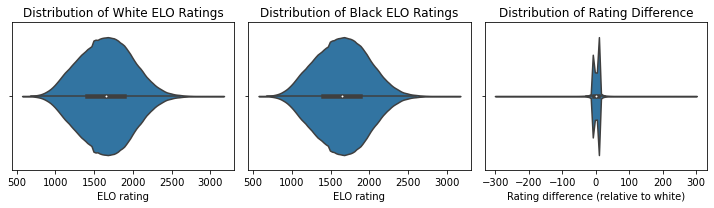

In [11]:
# Make 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(10,3))

# Plot violin plots of distribution of ELOs
sns.violinplot(x='WhiteElo', data=df, ax=ax1)
ax1.set_title("Distribution of White ELO Ratings")
ax1.set_xlabel("ELO rating")

sns.violinplot(x='BlackElo', data=df, ax=ax2)
ax2.set_title("Distribution of Black ELO Ratings")
ax2.set_xlabel("ELO rating")

# Violin plot of rating difference
sns.violinplot(x='WhiteRatingDifference', data=df, ax=ax3)
ax3.set_title("Distribution of Rating Difference")
ax3.set_xlabel("Rating difference (relative to white)")

plt.tight_layout() # Helps format the graphs

The first 2 plots show us that distribution of rating is nearly identical for white and black ratings, which is definately good for analysis. Additionally, it is quite a smooth normal distribution with a center at about a rating of 1650. There does seem to be a longer tail on the right side, and this makes sense since the low rated players usually can only do so bad, while near the top level play some of the best players can achieve much higher ratings than other players. <br> <br>
The 3rd plot shows us the rating difference between white and black. It seems from this plot that the vast majority of our games have a very small rating difference, with the players tending to be within +/- 20 points. Knowing this we can then go back to our data cleaning and reduce the range of games we consider to only allow for the ratings to be within 25 point of one another since we know there will still be plenty of games to analyze, and those are the games which should be a better indicator for an openings success (since more equal skill level between players). 

In [12]:
df = df[abs(df.WhiteRatingDifference) <= 25]

Next we'll look at the distribution of the categorical data, namely the game speed and win percentages as each color.

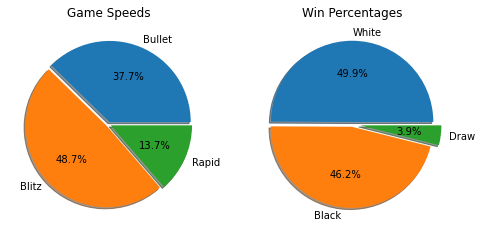

In [13]:
# Calculate percentages of each time control
bullet_games = len(df[df.Speed == "Bullet"]) / len(df)
blitz_games = len(df[df.Speed == "Blitz"]) / len(df)
rapid_games = len(df[df.Speed == "Rapid"]) / len(df)
speeds = [bullet_games, blitz_games, rapid_games]

# Calculate percentages of results
white_wins = len(df[df.Result == 1.0]) / len(df)
black_wins = len(df[df.Result == 0.0]) / len(df)
draws = len(df[df.Result == 0.5]) / len(df)
win_percs = [white_wins, black_wins, draws]

# Plot results in pie charts
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,8))
ax1.pie(speeds, labels=["Bullet", "Blitz", "Rapid"], autopct='%1.1f%%', shadow=True, explode = (.03,.03,.03), normalize=False);
ax1.set_title("Game Speeds")

ax2.pie(win_percs, labels=["White", "Black", "Draw"], autopct='%1.1f%%', shadow=True, explode = (.03,.03,.1), normalize=False);
ax2.set_title("Win Percentages");

We see from the first pie chart that almost half the games we are analyzing are blitz games. This may seem like a problem at first, but we need to remember that we have nearly 5 million games, so even the 13.7% of rapid games, which might seem like a low percentage, equates to approximately 700,000 games, which is plenty of data. We will keep this in mind though during later analysis. <br> <br>
The second pie chart tells us the win percentages of each color. Here we see white tends to win a bit more than black, which is what we'd expect, and that there are very few draws. The reason for this low percentage of draws relates to the game speeds. With faster games such as bullet or blitz, there tends to be more decisive results, while in other game speeds such as rapid and classical (we have no classical data since that is usually from over the board tournament chess and we got our data from online chess) draws are much more common. 

### "Best" Openings
The time has come. Now that we have an idea of what our data looks like, lets try to figure out what the best overall openings in the dataset are. A logical way to do this would be to look at which openings have the highest win percentage, and those should be the best opening, right? Lets go ahead a make a new dataframe with all of their openings and win percentages.

In [14]:
# 'Result' indicating the total number of points won with that opening (win = 1, draw = 1/2, loss = 0)
openings = df[['Opening', 'Result']].groupby('Opening').sum()
openings['TotalGames'] = df[['Opening', 'Result']].groupby('Opening').size()
openings['WinPerc'] = openings.Result / openings.TotalGames
openings.head()

,Result,TotalGames,WinPerc
Opening,,,
Alekhine Defense,26865.0,53780,0.499535
Alekhine Defense #2,1470.0,2710,0.542435
Alekhine Defense #3,215.0,491,0.437882
Amar Gambit,2.0,2,1.000000
Amar Opening,668.5,1389,0.481281


With such a large dataset we're bound to have some novelty openings that are only played a few times and are not really considered sound openings. For example, you can see that we have the "Amar Gambit" above, which has an astounding 100% win rate. However, this opening was only played twice in the entire dataset of almost 5 million games, indicating that it's not a "real" opening. <br><br>
Due to these openings with low game counts having very skewed win percentages that can mess with our analysis, we will be dropping any opening that accounts for less than .1% of our data (5,000 games), as if these openings were high quality surely they would be played more often. This idea of dropping openings with low game counts is going to be coming back quite shortly so stay tuned.

In [15]:
openings = openings[openings.TotalGames >= 5000]
openings.head()

,Result,TotalGames,WinPerc
Opening,,,
Alekhine Defense,26865.0,53780,0.499535
Benoni Defense,13368.0,26794,0.498918
Bird Opening,25345.0,49466,0.512372
Bishop's Opening,42858.0,78595,0.545302
Blackmar-Diemer Gambit,8533.0,16543,0.515807


Now it's time to graph this and see what are the "best" openings are according to win percentage. We will only be plotting the top 25 openings as otherwise the graph would be too cluttered. <br><br>
The results of the graph are probably not going to be what one may expect to be the best openings. This is mainly due to 2 reasons, both of which were hinted to earlier. Can you spot why?

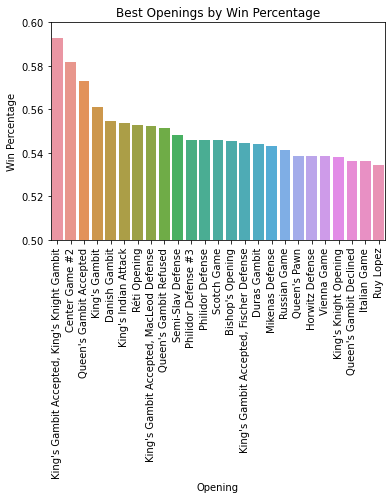

In [16]:
# Sort by win percentage
top_25 = openings.sort_values('WinPerc', ascending=False)[:25].reset_index()

ax = sns.barplot(x="Opening", y="WinPerc", data=top_25)
plt.xticks(rotation='vertical'); # Make openings readable
ax.set_ylim(.5, .6) # Set y-range to make distinctions clear
ax.set_ylabel("Win Percentage")
ax.set_title("Best Openings by Win Percentage");

This is a critical point in our analysis where we need to reflect on what this plot is tellign us. Like I said before, this plot, at least according to chess players, is not representative of what are usually considered the "best" openings. Like I was saying earlier, this is due to 2 major reasons. Let's go through them below:
1. White vs. Black openings: As we saw in the pie chart on results by color, we saw that black had a slightly lower overall win percentage than white. What this means is that openings that are classified as "black openings" will tend to have lower win percentages than many of the white openings simply because white has a slight advantage. However, we need an opening repotoire for both white and black and therefore our analysis should also be looking at the top black openings. If you know some openings you can see that the vast majority of the openings in this graph above are for white. <br><br>
In order to account for this issue, we get back the problem that I mentioned at the start, namely labeling openings as black or white. My solution here will be to do a similar analysis to the one above and manually select the top 5 black openings, in which we will do further analysis on those. While not perfect, that approach should yield significant results without the trouble of manually labeling all of the openings. <br><br>
2. Frequency: Probably the larger issue with this method of finding the best opening is the approach of purely focusing on win percentage. The major issue with that is that some openings have smaller sample sizes (which is why we removed ones with less than 5,000 games), and if these openings are played well in the small sample it will have an artificially large win percentage. These would gravitate to be openings that have a large variance, of which gambits (where you sacrifice material for positional advantage) tend to be the prime candidates. As our results show, many of the top 25 openings by this measure are in fact gambits, defending this hypothesis. <br> <br>
Now to check this hypothesis we will grpah the frequency of these top 25 openings below:

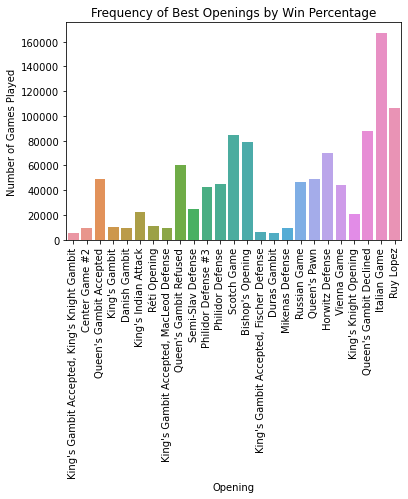

In [17]:
ax = sns.barplot(x="Opening", y="TotalGames", data=top_25)
plt.xticks(rotation='vertical');
ax.set_ylabel("Number of Games Played")
ax.set_title("Frequency of Best Openings by Win Percentage");

Aha! So it seems our hypothesis was correct. Many of what we initially considered as our top 25 openings are played in very low frequency relative to other openings in our dataset. Thinking about it a little more, the frequency of an opening may be as or even more important than it's win percentage. This is because if an opening was bad, people would not play it as frequently (to be clear, this is an assumption, but I think I can faily assume that people do not want to play bad chess), and thus we can consider it a bad opening. <br><br>
Taking this new idea into account, maybe we can make a new measure of how good an opening is be WinPerc*Freq, since this takes both ideas into account. One thing to note is that the dominant term in this relation is the opening's frequency. This is due to the fact that opening frequency has a much higher variance than win percentages. For example, an opening that is played 30,000 times with a win percentage of just 33% will be ranked the same as an opening player 10,000 times wit an 100% win percentage. To account for this I will take the log of the number of games played to reduce it's effect.

### Best Openings By WinPerc*Freq

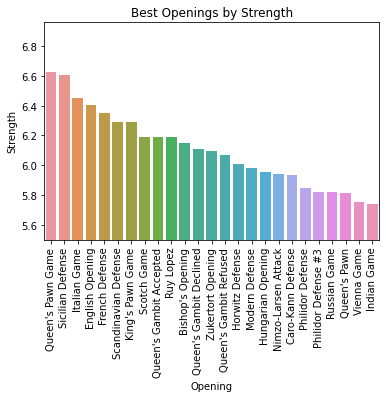

In [18]:
openings['Strength'] = np.log(openings.TotalGames) * openings.WinPerc

# Get the top 25 on this measure
top_25 = openings.sort_values('Strength', ascending=False)[:25].reset_index()

ax = sns.barplot(x="Opening", y="Strength", data=top_25)
plt.xticks(rotation='vertical');
ax.set_ylim(5.5,)
ax.set_ylabel("Strength")
ax.set_title("Best Openings by Strength");

Hmm, again we are getting results that don't align so well with what would be expected according to chess experts. While this is an analysis of all player's and not just expert play, the results still don't feel right. <br><br>
Seeing these results makes us wonder what other data we have that can answer our question. What if we just look at frequency? Well, that probably doesn't make much sense since people can be blindly playing an opening often without realizing that a different one can have a higher win percentage, and that is of course what we are looking for from the opening. The other data we have also probably wouldn't help answer this question. So what can we do?

### Reavaluation of the Question
We have come to an important point in any data science project. That is, what do you do when you get stuck trying to answer the question you were asking? The first thing you should do is reevaluate the question itself. Is this something that can be answered with our data, or even with any amount of data? <br><br>
Our question of "what is the best chess opening by rating," while it seems like a simple question to answer with data, is actually quite complex for a multitude of reasons. For example, in lower rated games often the opening is nearly irrelevant to the result of the game since the outcome is more heavily decided by midgame and endgame play. Additionally, while an opening may have a high general win percentage that doesn't necessarily mean that changing to play that opening will make you have that same win percentage (this is because openings tend to have different flavors, creating different piece structures that lend themselves better to some players more than others). Maybe we cannot answer this question with the data we possess. So what question should we be looking at? 

### Updated Question
A different question we can look at with our data is to determine general success rates of popular openings. In other words, are the most popular openings performing well and how do these change at different rating levels and time controls? This is a good question we can ask because we will be able to have clear results. With this new question in mind, lets tke a look at our data in this light.

### Most Popular Openings
Here we'll look at the top 20 most popular openings:

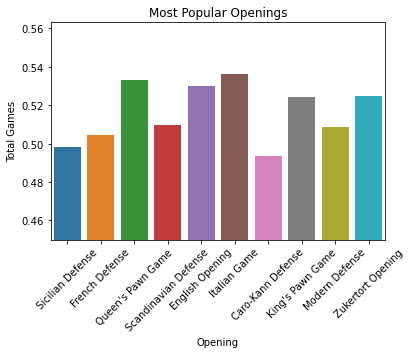

In [28]:
# Top 10 most popular openings
top_10_pop = openings.sort_values('TotalGames', ascending=False)[:10].reset_index()

ax = sns.barplot(x="Opening", y="WinPerc", data=top_10_pop)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(.45,)
ax.set_ylabel("Total Games")
ax.set_title("Most Popular Openings");

Here, since we're just looking at popularity, we actually have a good mix of white and black openings, alleviating the issue of only analyzing white openings since they tend to have higher win percentages. <br><br>
The openings in this top 10 are definately highly popular openings. Many of these openings are openings that are "defined" at only a move or 2, which makes sense since these positions will be reached often. Additionally, these openings seem to have high win percentages overall, with the black openings nearing a win percentage of 50%, while white openings reach almost 54%. Let's now look at how these change (or stay similar) in different time formats.

### Openings Popularity in Different Time Formats

In [29]:
# Top 10 openings by time control
def top_by_speed(df, speed):
    sub = df[df.Speed == speed] 
    openings = sub[['Opening', 'Result']].groupby('Opening').sum()
    openings['TotalGames'] = sub[['Opening', 'Result']].groupby('Opening').size()
    openings['WinPerc'] = openings.Result / openings.TotalGames
    return openings.sort_values('TotalGames', ascending=False)[:10].reset_index()

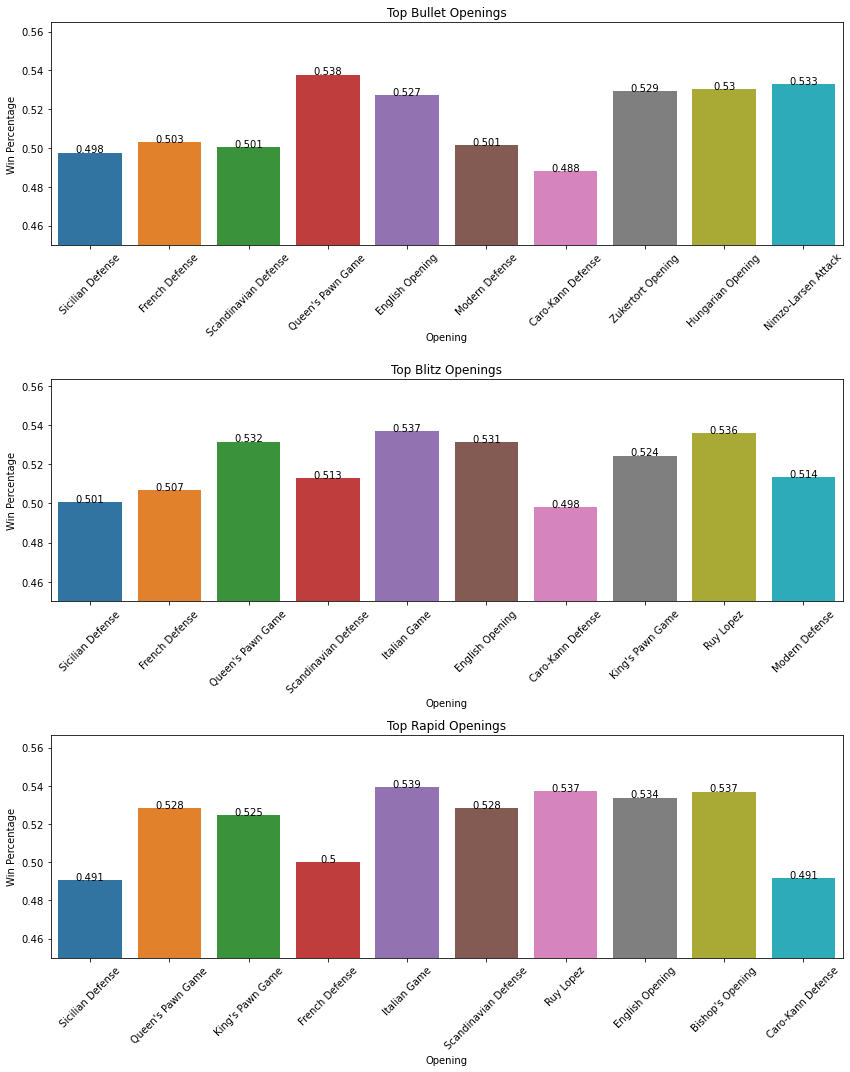

In [21]:
# Calculate top 10 at each time control
top_bullet = top_by_speed(df, "Bullet")
top_blitz = top_by_speed(df, "Blitz")
top_rapid = top_by_speed(df, "Rapid")

# Make 3 subplots to plot out top 10 most popular in each time control
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,15))

g1 = sns.barplot(x='Opening', y='WinPerc', data=top_bullet, ax=ax1)
ax1.set_title("Top Bullet Openings")
ax1.set_xlabel("Opening", va="bottom")
ax1.set_ylabel("Win Percentage")
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylim(.45,)
# Add text displaying height
for index, row in top_bullet.iterrows():
    g1.text(row.name,row.WinPerc, round(row.WinPerc,3), color='black', ha="center")
    
g2 = sns.barplot(x='Opening', y='WinPerc', data=top_blitz, ax=ax2)
ax2.set_title("Top Blitz Openings")
ax2.set_xlabel("Opening")
ax2.set_ylabel("Win Percentage")
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_ylim(.45,)
for index, row in top_blitz.iterrows():
    g2.text(row.name,row.WinPerc, round(row.WinPerc,3), color='black', ha="center")

g3 = sns.barplot(x='Opening', y='WinPerc', data=top_rapid, ax=ax3)
ax3.set_title("Top Rapid Openings")
ax3.set_xlabel("Opening")
ax3.set_ylabel("Win Percentage")
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_ylim(.45,)
for index, row in top_rapid.iterrows():
    g3.text(row.name,row.WinPerc, round(row.WinPerc,3), color='black', ha="center")

plt.tight_layout() # Helps format the graphs

This is a crucial point in our analysis, where we finally get to see the trends in popular openings at each time control with their success rate. The first thing to point out about this is that interestingly, the success rate of each opening stays pretty much the same across the time controls, with no opening differing by more than 0.3%. We also see that some of the overall most popular openings stay consistently in the top openings in all the time controls, such as the Sicilian, French, and Queen's Pawn. <br><br>
One trend that makes a lot of sense is that some of the more foundationally solid openings that are played at the highest rank and can be quite complex are not so popular in bullet, where there is no time to think of clever tactics in the difficult positions, and they are much more populat with a longer time format. Openings that fit this trend are the King's Pawn, Ruy Lopez, and Italian. These, as you can see, have some of the highest success scores int he blitz and rapid time fomates, while they're not even in the top 10 most popular for bullet. This would suggest that you should aim to play these openings when you will have more time to think of clever ideas, and it may be less solid when playing a very quick game. <br><br>
Some of the more obscure openings such as the Modern, Zukertort, and Hungarian are played with relatively high frequency (and success) in bullet games, but then disappear as we get to the longer time formats. This may be because in a quick game, since these openings are more obscure, your openent may not be as well prepared and will need to spend valuable time figuring out the position rather than just playing known patterns, which can be a major advantage in bullet games. However, since in blitz and rapid there is more time to think of how to counter these, and since they're not as foundationally solid openings, they begin to get played less. <br><br>
Overall, it seems that the popular openings tend to have high win percentages, which makes sense, and that the "stronger" openings tend to get played more in longer time formats while more obscure openings are played more in the quick games. 


### Opening Popularity Across Different Ratings

In [22]:
# Calculate average elo for each game 
df['avgElo'] = (df.WhiteElo + df.BlackElo)/2
ratings_df = df.sort_values('avgElo')
ratings_df.head()

,Site,Result,WhiteElo,BlackElo,WhiteRatingDifference,Termination,Opening,OpeningLine,Speed,avgElo
31374,https://lichess.org/4ybVbZwe,1.0,605.0,606.0,8.0,Normal,Russian Game,Urusov Gambit,Blitz,605.5
105966,https://lichess.org/poOXd2BT,1.0,613.0,600.0,18.0,Normal,Italian Game,None,Bullet,606.5
30771,https://lichess.org/HzXYRKwo,0.0,602.0,619.0,-2.0,Normal,Gedult's Opening,None,Blitz,610.5
106675,https://lichess.org/1Z4SOSD9,0.0,600.0,631.0,0.0,Time forfeit,Queen's Pawn Game,Chigorin Variation,Bullet,615.5
70438,https://lichess.org/ZwcWEvYK,1.0,605.0,627.0,11.0,Time forfeit,Grob Opening,None,Blitz,616.0


In [30]:
# Plot the top 10 most popular openings by rating level
def top_by_rating(low, ax):
    # Clear the figure if we're done
    if low == 2800:
        plt.clf()
        return
    # Range of 100 points of elo
    high = low + 100
    
    # Subset data to be in range
    ret = df[df.avgElo >= low]
    ret = ret[ret.avgElo < high]
    
    # Calculate necessary statistics
    temp = ret[['Opening', 'Result']].groupby('Opening').sum()
    temp['TotalGames'] = ret[['Opening', 'Result']].groupby('Opening').size()
    temp['WinPerc'] = temp.Result / temp.TotalGames
    temp = temp.sort_values('TotalGames', ascending=False)[:10].tail(10).reset_index()
    data = temp.iloc[::-1] # Reverse the order of the data
    ax.clear() # Clear axis from last time
    
    # Draw a horizontal barplot of most popular opening by rating, with the color 
    # being defined by the opening
    ax.barh(data.Opening, data.TotalGames, color=[colors[x] for x in data.Opening]);
    dx = data.TotalGames.max() / 200
    
    # Add labels + format
    for i, (value, name) in enumerate(zip(data.TotalGames, data.Opening)):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.2, "Ratings: "+str(low) + "-"+ str(high), transform=ax.transAxes, color='#777777', size=36, ha='right', weight=800);
    ax.text(0, 1.06, 'Number of Game Played', transform=ax.transAxes, size=12, color='#777777');
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The Most Popular Openings by ELO',
            transform=ax.transAxes, size=24, weight=600, ha='left');
    plt.box(False)

In [31]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Defines which opening goes to which color
colors = dict(zip(
        ["King's Pawn Game", "Queen's Pawn Game", "Van't Kruijs Opening", "Scandinavian Defense", 
        "Italian Game", "Gedult's Opening", "Russian Game", "French Defense", "English Opening", 
        "Sicilian Defense", "Bishop's Opening", "Zukertort Opening", "Four Knights Game", 
        "Ruy Lopez", "Scotch Game", "Caro-Kann Defense", "Modern Defense", "Queen's Gambit Declined",
        "Indian Game", "Hungarian Opening", "Nimzo-Larsen Attack", "King's Indian Attack"],
        ['b', 'g', 'r', 'c', 'm', 'y', '#232b2b','#FFA500','#800080','#52899A', "#F2795F",
        "#696969", "#CD9DD4", "#F90E9F", "#B3AE0D", "#35D5B9", "#49B303", "#5A65BD", "#A30C6C",
        "#C46D10", "#CEB8A1", "#0AF95C"]
        ))

# Plot the animated plot
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, top_by_rating, frames=np.arange(600, 2801, 100), fargs=(ax,), interval=500)
HTML(animator.to_jshtml())

<Figure size 1080x576 with 0 Axes>

There's lots to analyze about this plot, so lets take it step-by-step: <br><br>
First of all, we can notice that the top 10 openings at the lowest ratings are quite different from the top openings at the higher ELOs. And even if they're both in the top 10 they actually have no overlap between their top 5 openings. This does make sense since some openings, while they may be "better," they require much more theory and can lead to more complex games that wouldn't be good for beginners to play, so this trend we see makes sense. <br><br>
Next we can observe the rise and fall of particular openings, since these indicate which openings are popular at a certain rank and might be good to learn if you're within that level. One of the most obvious falls is the King's Pawn Game, in which it starts as the most popular opening and continues that way through much of the lower ranks. However, once the Sicilian takes over, the King's Pawn Game quickly falls, until 500 ELO later when it's not even in the top 10 anymore. A reasonable explanation for this is that the opening follows strong opening priciples, so it is strong and easy to learn. However, once you more thoroughly understand the game there are openings with much theory that expand upon this, so stronger players tend to do those openings more often. The opening that made the biggest rise was the Sicilian, which once it overtook the King's Pawn Game as the most popular it stayed that way until the end. A major reason I believe this happened is because the Sicilian is considered one of the best opening responses to e4, and therefore a great option when playing black. Additionally, the basic concepts of the Sicilian are not too hard to learn (definately more complex than others such as the King's Pawn Game though), but attainable for mid-level players. It also goes into really deep theory and lines which work very well even at top level play, so that's why it stays at the top (until final rating bracket, but that has very low sample size). <br><br>
I'd say the major takeaway from this is that popular openings vary quite a bit depending on what rating you are at, and that when thinking about expanding your opening repotoire you should mainly consider learnings the popular openings at your rating level. That is because even if other openings may seem better because stronger players use these, since the game is not just memorizing openings and seeing who can play that better and you actually need to finish the game, the positions that arise from these openings may be too complex to play well, causing the opening to not be a good option for you even if it is considered good. 

## In Depth Exporation of an Opening
Here we will take the most frequently played openings overall, which we can see is the Sicilian, and look at some of the opening lines. Since each of these openings have many of these lines it is important to analyze these as well to see which lines may suit you the best and have the overall best statistics on them. Lucky enough, we can run the same analysis as before, just on the opening lines now since we're trying to understand the same concepts, just now about more in depth lines rather than just the broad overview.

In [32]:
# Updated function from before to work for Sicilian opening
def top_by_speed_sicilian(df, speed):
    sub = df[df.Opening == "Sicilian Defense"]
    sub = ret[ret.Speed == speed]
    openings = sub[['OpeningLine', 'Result']].groupby('OpeningLine').sum()
    openings['TotalGames'] = sub[['OpeningLine', 'Result']].groupby('OpeningLine').size()
    openings['WinPerc'] = openings.Result / openings.TotalGames
    return openings.sort_values('TotalGames', ascending=False)[:10].reset_index()

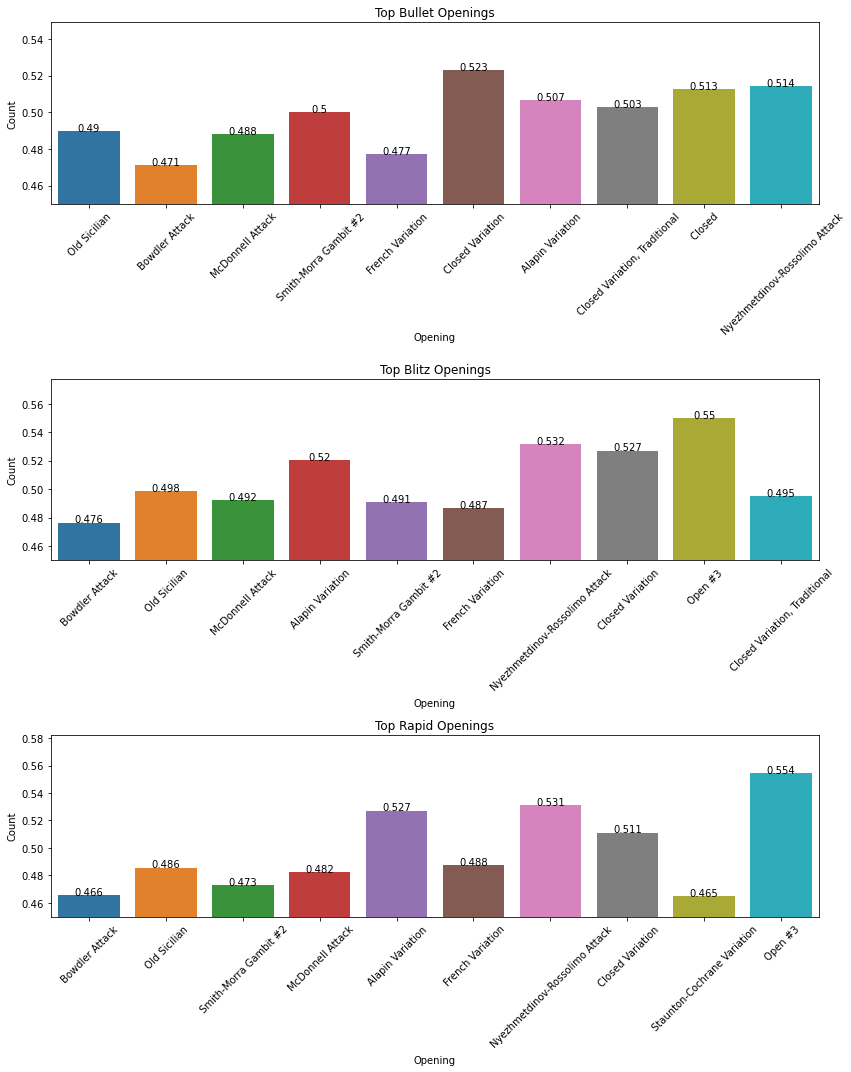

In [26]:
# Same as before, just with analyzing lines of the Sicilian Defense
top_bullet = top_by_speed_sicilian(df, "Bullet")
top_blitz = top_by_speed_sicilian(df, "Blitz")
top_rapid = top_by_speed_sicilian(df, "Rapid")

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12,15))

g1 = sns.barplot(x='OpeningLine', y='WinPerc', data=top_bullet, ax=ax1)
ax1.set_title("Top Bullet Openings")
ax1.set_xlabel("Opening", va="bottom")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylim(.45,)
for index, row in top_bullet.iterrows():
    g1.text(row.name,row.WinPerc, round(row.WinPerc,3), color='black', ha="center")
    
g2 = sns.barplot(x='OpeningLine', y='WinPerc', data=top_blitz, ax=ax2)
ax2.set_title("Top Blitz Openings")
ax2.set_xlabel("Opening")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_ylim(.45,)
for index, row in top_blitz.iterrows():
    g2.text(row.name,row.WinPerc, round(row.WinPerc,3), color='black', ha="center")

g3 = sns.barplot(x='OpeningLine', y='WinPerc', data=top_rapid, ax=ax3)
ax3.set_title("Top Rapid Openings")
ax3.set_xlabel("Opening")
ax3.set_ylabel("Count")
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_ylim(.45,)
for index, row in top_rapid.iterrows():
    g3.text(row.name,row.WinPerc, round(row.WinPerc,3), color='black', ha="center")

plt.tight_layout() # Helps format the graphs

These results are quite interesting. There are many things to say about it, but there is one specific aspect I would like to highlight. <br><br>
The Sicilian, being quite a complex opening, when faced by white sometimes he may want to do a simple move and not fall into all of black's preperation. As a chess player myself, when I play people who are playing openings with lots of thoery behind it, I often want to try getting out of theory since I believe that they are probably more prepared. This is the case with the Bowdler attack here. It is an opening by white that does not fall into the mainline Sicilians, so in both blitz and rapid we can see that many people try to play this way. However, looking at the win percentage we see that it's under 50%, and it's a white opening! This seems foolish for people to just blindly go into this attack against the Sicilian while there are plenty of other lines that have a much higher success rate. this tells us that a blind following of frequency is for sure the wrong approach to do an analysis of openings and this gives evidence for why analysis such as this project can be useful. <br><br>
Another important thing to note about these graphs is that while the top 3 most frequently played openings don't change much across the time controls, the bottom half change a lot. The Sicilian can be a very dynamic opening with many different ideas, and with each time control comes different tactics for the best play. This causes different lines of the Sicilian to be chosen to best fit whichever time control is being played.

## Conclusion + Further Work
In this project we began by asking what at first glance seems like a simple question, "what are the best openings in chess?" By going through some exploratory analysis we realized that chess is quite a complex game and we can't simply determine what is the "best" opening with the data we have, and potentially with even more. However, by rephrasing our question we we're able to discover trends in opening popularity, and how well these popular openings perform at different time controls and rating levels. From this we were able to understand more about certain openings and can help guide decisions for which openings to try out for yourself! <br><br>
To expand upon this tutorial, you can do even further analysis. For one, you can take an opening you are learning and run it through analysis similar to what we did for the Sicilian Defense or see how it performs at your elo. Additionally, you can maybe gather more data such as what color each opening is defines as, what type of opening it is (closed/open, aggressive/passive, tactical/positional), and from there you can make a machine learning tool to suggest good openings for you by inputting what type of opening fits your play-style and what rating you currently are. You can also expand this to include classical games and computer games, which can add an interesting additional layer. Plenty more further analysis exists 
so be creative!
## Additional Resources
- Explore chess openings: https://www.chess.com/explorer
- Evolution of chess openings: http://www.randalolson.com/2014/05/26/a-data-driven-exploration-of-the-evolution-of-chess-popularity-of-openings/
- Book on chess openings: https://www.amazon.co.uk/dp/9056912038/?coliid=I1BYOXXYNIN94C&colid=2LP9S64U4UNM0&psc=0&ref_=lv_ov_lig_dp_it
- Try some openings out on [chess.com](https://www.chess.com/home)!
